#Aula 7 - Dissimilaridades e métricas


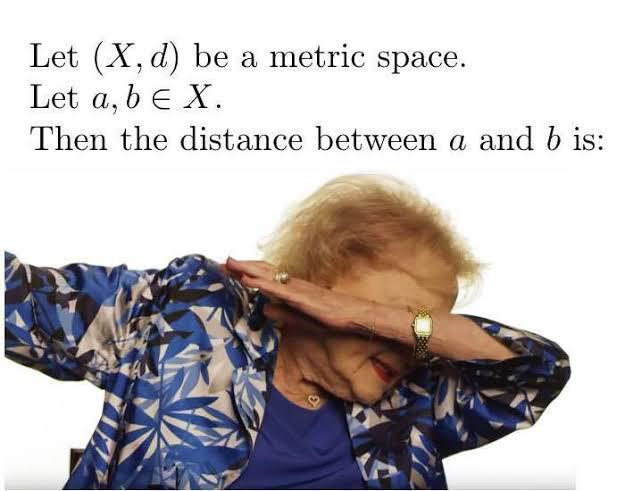

Ainda não consigo acreditar que achei um meme sobre esse tópico... (https://www.reddit.com/r/mathmemes/comments/coe9u4/cant_believe_you_can_make_a_meme_about_metric/)

# Preliminares

Pergunta fundamental e natural em análise de dados:

**Dados dois objetos de interesse, $a$ e $b$, é o caso que $a$ é similar a $b$?**

Apesar de natural, a resposta para a pergunta acima nem sempre é simples e pode depender de vários fatores:
- Tipo de dados (numéricos, categóricos, textos, conjuntos, sequências, séries de tempo...)
- Da aplicação e interpretação desejada
- De requisitos impostos por um algoritmo específico
- ...

**Sugestões?**

#Funções de dissimilaridade

Para quantificar a dissimilaridade entre dois objetos, usamos funções de dissimilaridade.

Hoje veremos algumas dissimilaridades populares e úteis.

## Vetores Reais

Comumente, um conjunto de dados é dado por uma matriz $\mathbf{X}$ como a apresentada abaixo.

$$ \mbox{$n$ objetos}\left\{\begin{array}{c}\;\\\;\\\;\\\;\\\;\end{array}\right.\;\;\overbrace{\left[\begin{array}{ccccc}
\begin{array}{c}x_{11}\\\vdots\\x_{i1}\\\vdots\\x_{n1}\end{array}&
\begin{array}{c}\dots\\\ddots\\\dots\\\ddots\\\dots\end{array}&
\begin{array}{c}x_{1j}\\\vdots\\x_{ij}\\\vdots\\x_{nj}\end{array}&
\begin{array}{c}\dots\\\ddots\\\dots\\\ddots\\\dots\end{array}&
\begin{array}{c}x_{1m}\\\vdots\\x_{im}\\\vdots\\x_{nm}\end{array}
\end{array}\right]}^{\mbox{$m$ atributos}} = \mathbf{X}$$



As linhas de $\mathbf{X}$ podem representar Pessoas, Livros, Filmes... Já as colunas representam as características/atributos (*features*) dos objetos.

Assim, cada objeto/linha pode ser visto como um vetor real $m$-dimensional (i.e., um elemento de $\mathbb{R}^m$).

Dados $\mathbf{x} \in \mathbb{R}^m$ e $\mathbf{y} \in \mathbb{R}^m$, como quantificar a diferença entre $\mathbf{x}$ e $\mathbf{y}$?

### Distância Euclidiana

Uma das formas mais comuns de quantificar a distância entre dois vetores é utilizando a distância Euclidiana, que é baseada na norma $\ell_2$.

Nesse caso, dados $\mathbf{x} \in \mathbb{R}^m$ e $\mathbf{y} \in \mathbb{R}^m$:

$$d(\mathbf{x}, \mathbf{y}) =  \Vert \mathbf{x} - \mathbf{y} \Vert_2  = \sqrt{\sum_{i=1}^m (x_i - y_i)^2}.$$

### Distância de Manhattan

Nome inspirado na distância que deve ser percorrida para se chegar a um destino na ilha de Manhattan.

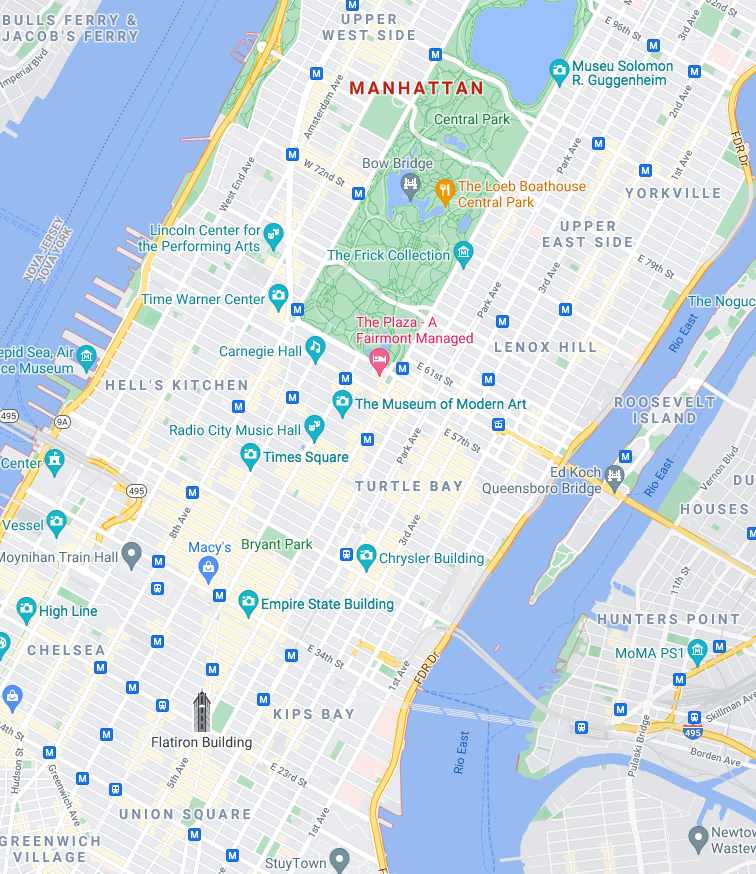

Nesse caso, dados $\mathbf{x} \in \mathbb{R}^m$ e $\mathbf{y} \in \mathbb{R}^m$:

$$d(\mathbf{x}, \mathbf{y}) =  \Vert \mathbf{x} - \mathbf{y} \Vert_1  = {\sum_{i=1}^m |x_i - y_i|}. $$

A figura abaixo apresenta uma interpretação geométrica das duas distâncias no caso do $\mathbb{R}^2$.

In [ ]:
import matplotlib.pyplot as plt

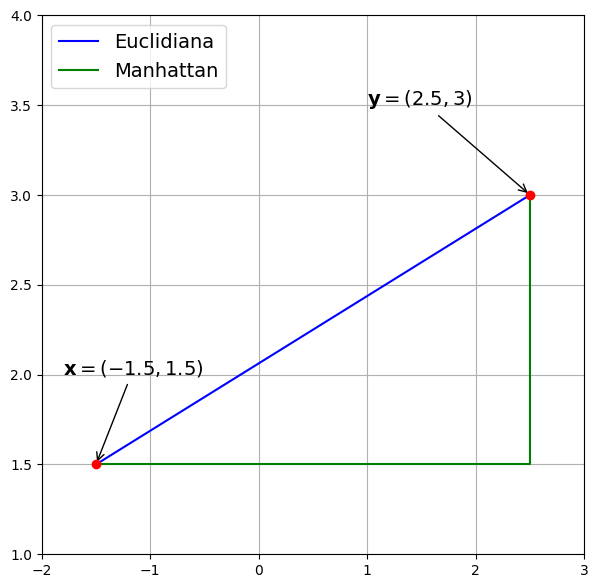

In [ ]:
plt.figure(figsize=(7,7))

plt.scatter([-1.5, 2.5], [1.5, 3], color = "red", zorder = 5)
plt.annotate(r'$\mathbf{x} = (-1.5, 1.5)$', xy=(-1.5, 1.5), xytext=(-1.8, 2), arrowprops=dict(arrowstyle="->"), size = 14)
plt.annotate(r'$\mathbf{y} = (2.5, 3)$', xy=(2.5, 3), xytext=(1, 3.5), arrowprops=dict(arrowstyle="->"), size = 14)

plt.plot([-1.5, 2.5], [1.5, 3], color = "blue", label = "Euclidiana")
plt.plot([-1.5, 2.5, 2.5], [1.5, 1.5, 3], color = "green", label = "Manhattan")
plt.grid(True)
plt.legend(loc = 2, fontsize = 14)
plt.xlim((-2, 3))
plt.ylim((1, 4));

Com ``numpy``, podemos calcular ambas facilmente:

In [ ]:
import numpy as np

In [ ]:
x = np.array([-1.5, 1.5])
y = np.array([2.5, 3])
print('Distância Euclidiana:', np.linalg.norm(x - y, ord = 2))
print('Distância de Manhattan:', np.linalg.norm(x - y, ord = 1))

Distância Euclidiana: 4.272001872658765
Distância de Manhattan: 5.5


### Distância de *Minkowski*

A Distância de *Minkowski* generaliza os conceitos acima:

$$ d(\mathbf{x}, \mathbf{y}) = \Vert \mathbf{x} - \mathbf{y} \Vert_p = \left(\sum_{i=1}^m |x_i - y_i|^p\right)^{\frac{1}{p}} $$

A figura abaixo apresenta os círculos unitários de acordo com diferentes valores de $p$ (fonte: https://en.wikipedia.org/wiki/Minkowski_distance)

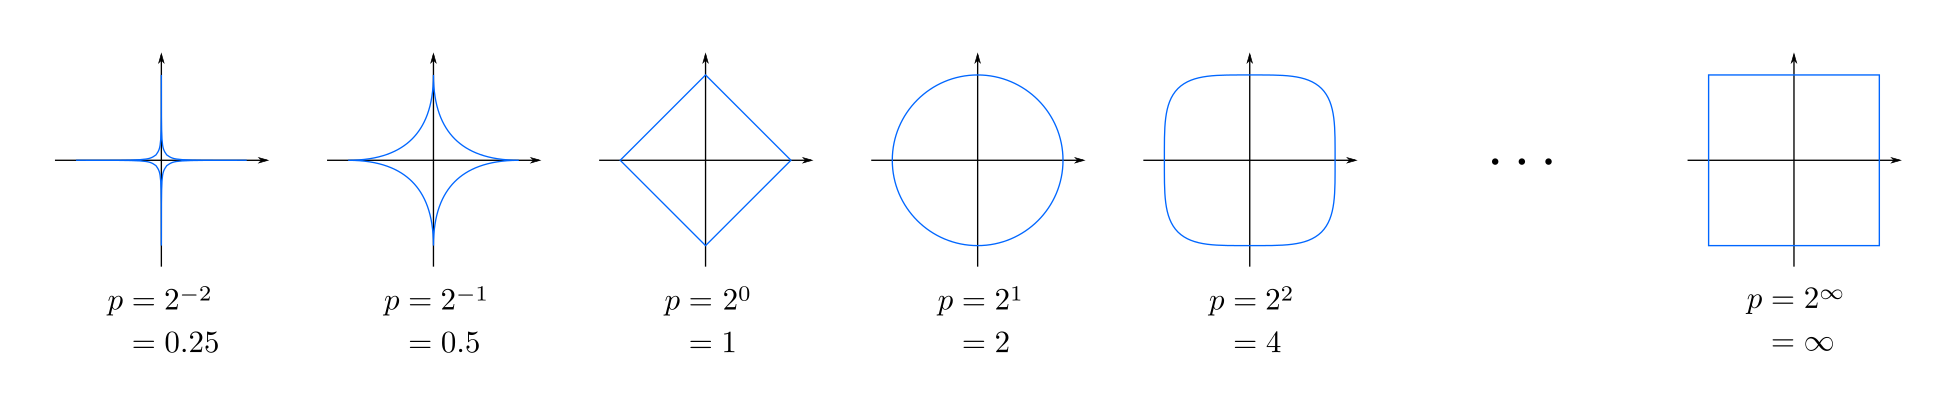

Os seguintes casos especiais são interessantes:
* $p = 1$, tem-se a distância de *Manhattan*
* $p = 2$, tem-se a distância Euclidiana
* $\displaystyle\lim _{p\to \infty }{\left(\sum _{i=1}^{m}|x_{i}-y_{i}|^{p}\right)^{\frac {1}{p}}}=\max _{i=1}^{m}|x_{i}-y_{i}|$
* $\displaystyle\lim _{p\to -\infty }{\left(\sum _{i=1}^{m}|x_{i}-y_{i}|^{p}\right)^{\frac {1}{p}}}=\min _{i=1}^{m}|x_{i}-y_{i}|$

### Distância do Cosseno

Da Álgebra Linear, sabemos que o cosseno do ângulo entre dois vetores $\mathbf{x} \in \mathbb{R}^m$ e $\mathbf{y} \in \mathbb{R}^m$ é:

$$\cos(\mathbf{x}, \mathbf{y}) = \frac{ \mathbf{x} \cdot \mathbf{y} }{\Vert\mathbf{x}\Vert \Vert\mathbf{y}\Vert} = \frac{\sum_{i = 1}^mx_iy_i}{\sqrt{\sum_{i = 1}^mx_i^2}\sqrt{\sum_{i = 1}^my_i^2}}$$




Vejamos alguns exemplos:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
x = np.array([-0.5, -1])
y = np.array([1, 2])
z = np.array([1, -0.5])
w = np.array([1, 1])
v = np.array([0.5, 1])

In [ ]:
def plot_vector(v, color):
  plt.quiver([0], [0], v[0], v[1],
       color = color,
       zorder = 10, alpha = 0.5, width = 0.013, angles='xy', scale_units='xy', scale=1)

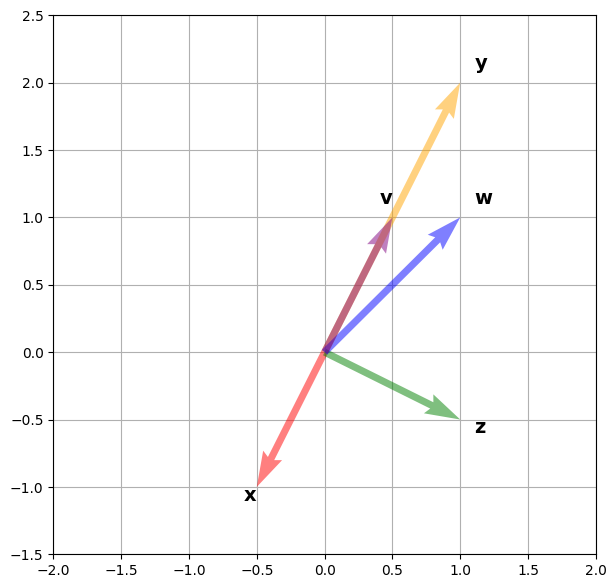

In [ ]:
plt.figure(figsize = (7, 7))

plot_vector(x, "red")
plot_vector(y, "orange")
plot_vector(z, "green")
plot_vector(w, "blue")
plot_vector(v, "purple")

plt.annotate(r'$\mathbf{v}$', xy=v, xytext=v+[-0.1, 0.1], size = 14)
plt.annotate(r'$\mathbf{x}$', xy=x, xytext=x-0.1, size = 14)
plt.annotate(r'$\mathbf{y}$', xy=y, xytext=y+0.1, size = 14)
plt.annotate(r'$\mathbf{z}$', xy=z, xytext=z+[0.1, -0.1], size = 14)
plt.annotate(r'$\mathbf{w}$', xy=z, xytext=w+[0.1, 0.1], size = 14)

plt.grid(True)

plt.xlim((-2, 2))
plt.ylim((-1.5, 2.5));

In [ ]:
def cosine(v, w):
  return v.dot(w) / (np.linalg.norm(v, ord = 2) * np.linalg.norm(w, ord = 2))

In [ ]:
print('cos(w, y) = ', cosine(w, y))
print('cos(x, y) = ', cosine(x, y))
print('cos(z, y) = ', cosine(z, y))
print('cos(v, y) = ', cosine(v, y))

cos(w, y) =  0.9486832980505138
cos(x, y) =  -0.9999999999999998
cos(z, y) =  0.0
cos(v, y) =  0.9999999999999998


Assim, uma forma popular de computar a distância entre vetores $\mathbf{x}$ e $\mathbf{y}$ é utilizando a distância do cosseno:

$$d(\mathbf{x}, \mathbf{y}) = 1 - \cos(\mathbf{x}, \mathbf{y}).$$

Repare que se as componentes de $\mathbf{x}$ e $\mathbf{y}$ forem não negativas, então $0 \le d(\mathbf{x}, \mathbf{y}) \le 1$.

**Como comparar a distância do cosseno com a distância euclidiana?**

São ferramentas diferentes e podem gerar resultados completamente diferentes. Algumas observações importantes:
- A distância do cosseno assume valores no intervalo $[0, 2]$, enquanto a distância euclidiana assume valores em $[0, \infty)$
- Pontos distantes com respeito à distância euclidiana podem estar próximos de acordo com o distância do cosseno.

Do ponto de vista de análise textual (aula passada), essas observações fazem com que a distância do cosseno seja interessante para comparar documentos:
1. Documentos sobre os mesmos tópicos, mas com intensidades diferentes, serão similares
2. As distâncias são menos influenciadas pelo comprimento dos documentos e pela diferença dos comprimentos dos documentos

## Vetores de bits

Quando trabalhamos com vetores de bits, a distância de Manhattan é comumente utilizada. Neste caso especial, ela é chamada de distância de *Hamming*.

Sejam $\mathbf{x} \in \{0, 1\}^m$ e $\mathbf{y} \in \{0, 1\}^m$, então a distância de *Hamming* é definida por:

$$d(\mathbf{x}, \mathbf{y}) = \sum_{i = 1}^m|x_i - y_i|.$$

A distância de *Hamming* conta o menor número de *bit flips* que são necessários para transformar um dos vetores no outro.

## Conjuntos

Sejam $X$ e $Y$ dois conjuntos, sendo que não há restrições sobre os tipos dos elementos que tais conjuntos contêm.

A distância de *Jaccard* permite quantificar a diferença entre $X$ e $Y$. Tem-se:
$$d(X, Y) = 1 - \frac{|X\cap Y|}{|X\cup Y|}.$$

Se $X \approx Y$, então $X\cap Y \approx X\cup Y$. Assim $d(X, Y) \approx 0$.
Similarmente, se $X$ e $Y$ são muito distintos, $d(X, Y) \approx 1$.

Uma implementação simples em Python.

In [ ]:
def jaccard_distance(x, y):
  inter = len(x.intersection(y))
  union = len(x) + len(y) - inter
  if union == 0:
    return 0
  else:
    return 1 - inter / union

In [ ]:
X = set(['carro', '1', '2.0', 'A'])
Y = set(['1', 'A', 'carro', '3.0'])

print('d(X, Y) = ', jaccard_distance(X, Y))

d(X, Y) =  0.4


Conjuntos podem ser representados por vetores de bits. No caso do exemplo acima, temos:

In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame([[1, 1, 1, 1, 0], [1, 1, 0, 1, 1]], columns = 'carro 1 2.0 A 3.0'.split(), index = ['X', 'Y'])
df

,carro,1,2.0,A,3.0
X,1,1,1,1,0
Y,1,1,0,1,1


Seja $\mathbf{x}$ a representação em vetor de bits de $X$ e $\mathbf{y}$ a representação em vetor de bits de $Y$. Assim, é possível escrever a distância de *Jaccard* como:
$$d(X, Y) = 1 - \frac{\sum_{i = 1}^m\min\{x_i, y_i\}}{\sum_{i = 1}^m\max\{x_i, y_i\}},$$
onde $m = |X \cup Y|$.

Agora repare que a expressão acima, pode ser computada mesmo nos casos em que $\mathbf{x}$ e $\mathbf{y}$ são vetores de números reais.
Assim, considere que $\mathbf{x} \in \mathbb{R}^m$ e $\mathbf{y} \in \mathbb{R}^m$, a quantidade
$$1 - \frac{\sum_{i = 1}^m\min\{x_i, y_i\}}{\sum_{i = 1}^m\max\{x_i, y_i\}}$$
é conhecida como **distância generalizada de *Jaccard***.


## Sequências

Sejam $S_1 = a_1, a_2, \dots, a_n$ e $S_2 = b_1, b_2, \dots, b_m$ duas sequências, onde todos os $a_i$'s e $b_i$'s pertencem a um alfabeto $\Sigma$.

Exemplo:
* $S_1 = $ ``waiter``,
* $S_2 = $ ``water`` e
* $\Sigma = $ alfabeto de letras minúsculas.

Como quantificar a dissimilaridade entre $S_1$ e $S_2$?

Para essa tarefa, pode-se usar a **distância de edição** (ou *Levenshtein distance*). A ideia é computar a soma mínima dos custos de todas as operações necessárias para transforma $S_1$ em $S_2$.

Definição e algoritmo vide **Lista 2**.

## Séries Temporais

Considere agora que estejamos trabalhando com observações coletadas ao longo do tempo. Considere também que os intervalos de medição são fixos, ou seja, nossos objetos de interesse são séries temporais.

Considere o exemplo abaixo. As duas séries são similares? Por quê?

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

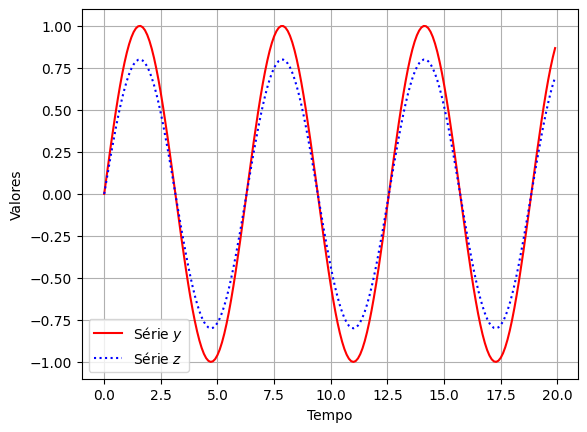

In [ ]:
x = np.arange(0, 20, 0.1);
y = np.sin(x)
z = 0.8 * np.sin(x)

plt.plot(x, y, color = "red", markersize = 2, label = 'Série $y$')
plt.plot(x, z, linestyle = ':', color = "blue", markersize = 2, label = 'Série $z$')

plt.xlabel('Tempo')
plt.ylabel('Valores')
plt.legend(loc = 'best')
plt.grid(True)

Mas e agora?

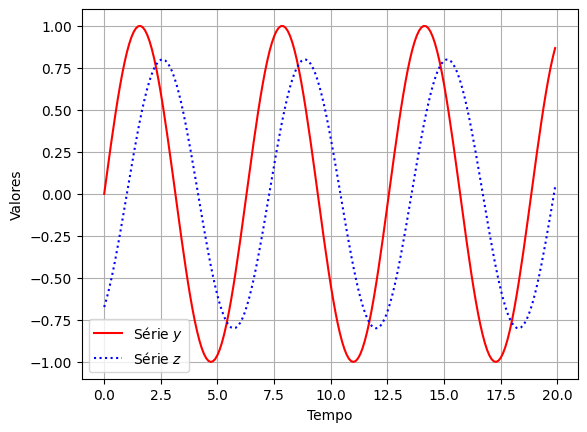

In [ ]:
x = np.arange(0, 20, 0.1);
y = np.sin(x)
z = 0.8 * np.sin(x - 1)

plt.plot(x, y, color = "red", markersize = 2, label = 'Série $y$')
plt.plot(x, z, linestyle = ':', color = "blue", markersize = 2, label = 'Série $z$')

plt.xlabel('Tempo')
plt.ylabel('Valores')
plt.legend(loc = 'best')
plt.grid(True)

No primeiro caso, podemos usar, por exemplo, a distância euclidiana, tratando cada série como um vetor.

Já no segundo caso, se usarmos a distância euclidiana, receberemos um resultado que indica que as séries são bem diferentes. No entanto, se a série azul for deslocada para a esquerda, pode-se perceber que ela descreverá, basicamente, o mesmo fenômeno que a série vermelha.

Assim, distâncias que comparam vetores **indice a índice não são adequadas para o caso de séries temporais** (a não ser que você queira fazer a comparação dessa forma).

Para fazer esse tipo de comparação, utilizamos uma dissimilaridade conhecida como DTW (*Dynamic Time Warping*). A Figura abaixo ilustra o conceito:

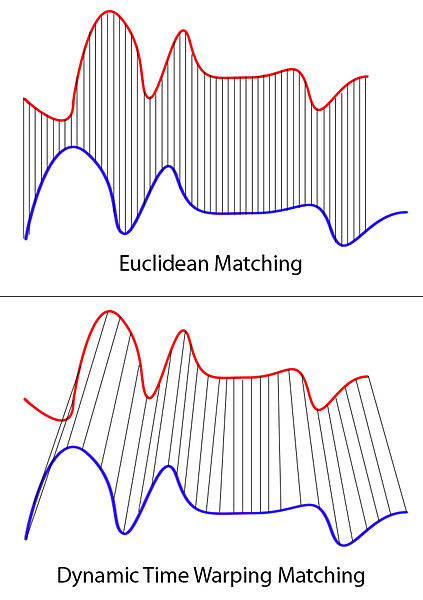

(fonte da figura: https://commons.wikimedia.org/wiki/File:Euclidean_vs_DTW.jpg)

Propriedades e algoritmo vide **Lista 2**.

## Matrizes

Sejam $\mathbf{X}$ e $\mathbf{Y}$ matrizes pertencentes ao $\mathbb{R}^{m\times n}$ (ou seja, matrizes reais com $m$ linhas e $n$ colunas).

Uma forma padrão de comparar $\mathbf{X}$ e $\mathbf{Y}$ é utilizando a norma de *Frobenius*. Ou seja:
$$d(\mathbf{X}, \mathbf{Y}) = \Vert \mathbf{X} - \mathbf{Y} \Vert_F = \sqrt{\sum_{i = 1}^m\sum_{j = 1}^n(x_{ij} - y_{ij})^2}.$$

In [ ]:
import numpy as np

In [ ]:
X = np.array([[1,2,3],[4,5,6],[7,8,9]])
Y = X + 0.001

print('X = \n', X)
print('Y = \n', Y)
print('d(X, Y) = ', np.linalg.norm(X - Y, ord = 'fro'))

X = 
 [[1 2 3]
 [4 5 6]
 [7 8 9]]
Y = 
 [[1.001 2.001 3.001]
 [4.001 5.001 6.001]
 [7.001 8.001 9.001]]
d(X, Y) =  0.002999999999999966


# Métricas

Algumas funções de dissimilaridade satisfazem as seguintes propriedades:
1. $d(x, y) \ge 0$
2. $d(x, y) = 0 \iff x = y$
3. $d(x, y) = d(y, x)$
4. $d(x, y) \le d(x, z) + d(z, y)$.

As dissimilaridades que satisfazem essas propriedades são chamadas de **métricas**.

Por que o conceito de métrica é relevante?
- Alguns algoritmos só funcionam quando as dissimilaridades são computadas por métricas
- O uso de dissimilaridades que são métricas simplifica muitas provas
- Métricas facilitam a interpretação de alguns resultados (apesar de esta ser uma afirmação perigosa, vide aula que vem).


### Como provar que uma dissimilaridade é uma métrica?

Vamos exemplicar uma prova com a distância de *Hamming*. Lembrando que a distância de *Hamming* é o número de posições em que $\mathbf{x}$ e $\mathbf{y}$ diferem.

#### Não negatividade

O número de posições que dois vetores diferem nunca será um número negativo.

#### Identidade de indiscerníveis

Se $d(\mathbf{x}, \mathbf{y}) = 0$, então não é necessário inverter nenhum bit de $\mathbf{x}$ para obter $\mathbf{y}$. Logo, os dois vetores são iguais.
Reciprocamente, se $\mathbf{x} = \mathbf{y}$, então $d(\mathbf{x}, \mathbf{y}) = 0$.

#### Simetria

O número de posições em que $\mathbf{x}$ e $\mathbf{y}$ diferem é o mesmo que o número de posições que $\mathbf{y}$ e $\mathbf{x}$ diferem.

#### Desigualdade triangular

Suponha que existam $\mathbf{x}$, $\mathbf{y}$ e $\mathbf{w}$ tais que
$$d(\mathbf{x}, \mathbf{y}) > d(\mathbf{x}, \mathbf{w}) + d(\mathbf{w}, \mathbf{y}).$$

Mas veja que podemos transformar $\mathbf{x}$ em $\mathbf{w}$ com $d(\mathbf{x}, \mathbf{w})$ inversões de bits e podemos transformar $\mathbf{w}$ em $\mathbf{y}$ com $d(\mathbf{w}, \mathbf{y})$ inversões de bits. Combinando esses dois passos, podemos transformar $\mathbf{x}$ em $\mathbf{y}$ com $d(\mathbf{x}, \mathbf{w}) + d(\mathbf{w}, \mathbf{y})$ inversões de bits.
**Mas isso contradiz a inequação colocada como hipótese.**

Assim, deve ser o caso que
$$d(\mathbf{x}, \mathbf{y}) \le d(\mathbf{x}, \mathbf{w}) + d(\mathbf{w}, \mathbf{y}).$$

# O problema da busca por objetos similares

Para abordar problemas corretamente e escolher os algoritmos certos, cientistas de dados precisam se preocupar com a escolha da métrica (ou dissimilaridade) constantemente. Vamos considerar um problema simples.

Seja $X = \{\mathbf{x}_1, \mathbf{x}_2, \dots, \mathbf{x}_n\}$ uma coleção de objetos, com $\mathbf{x}_i\in\mathbb{R}^m$, e $d$ uma função de dissimilaridade.

Dada uma *query* $\mathbf{q} \in \mathbb{R}^m$, quais pontos em $X$ estão "próximos" de $\mathbf{q}$?

**Sugestões?**

## Estratégia 1

Realize uma busca exaustiva. Assumindo que a função de dissimilaridade possa ser computada em tempo $O(m)$, cada *query* pode ser realizada em $O(nm)$.

**Caro!**

## Estratégia 2

Se $m << n$, o problema pode ser resolvido de forma eficiente utilizando uma *KD-Tree* (https://en.wikipedia.org/wiki/K-d_tree) ou variações.

Recomendo o estudo, mas não entraremos nesse tópico nessa disciplina.

## Estratégia 3

Se a dimensionalidade do problema é alta (i.e., $m$ é grande), podemos fazer uso de abordagens não exatas. Por exemplo, podemos utilizar funções *hash* de similaridade ou LSH (*Locality Sensitive Hashing*).

### *Locality Sensitive Hashing*

Vamos abordar o conceito de maneira informal. O texto da Wikipédia (https://en.wikipedia.org/wiki/Locality-sensitive_hashing) e o livro *Mining of Massive Datasets* (Referência no AVA) trazem um formalismo mais adequado.

**Ideia geral:** "encontrar/obter" uma função *hash*, $h$, tal que:
* Se $d(\mathbf{x}, \mathbf{y})$ assumir valor pequeno, então a $P(h(\mathbf{x}) = h(\mathbf{y}))$ é alta.
* Se $d(\mathbf{x}, \mathbf{y})$ assumir valor grande, então a $P(h(\mathbf{x}) = h(\mathbf{y}))$ é pequena.

#### Como podemos usar LSH para resolver o problema de encontrar pontos similares a $\mathbf{q}$ em $X$?

Sugestão:
1. pré-compute $h(\mathbf{x})$, para todo $\mathbf{x} \in X$
2. dada uma *query* $\mathbf{q}$, compute $h(\mathbf{q})$
3. inspecione todos os elementos em $X$ que colidem com $\mathbf{q}$
4. retorne apenas os pontos que de fato forem similares.

#### Exemplo de LSH para a distância de *Hamming*

**Pré-processamento:** obtenha um número aleatório, $i$, do conjunto $\{1, 2, \dots, m\}$ e defina $h(\mathbf{x}) = x_i$.




Dados vetores de bits $\mathbf{x}$ e $\mathbf{y}$ de comprimento $m$ quaisquer, qual a probabilidade de colisão com $h$?

Tem-se:

$$P(h(\mathbf{x}) = h(\mathbf{y})) = \frac{m - d(\mathbf{x}, \mathbf{y})}{m}.$$

Assim, essa definição captura a intuição de uma função *hash* para que ela possa ser uma LSH.

Veja que essa construção não resolve o problema mencionado acima. Como podemos melhorar essa LSH para que ela seja útil do ponto de vista prático?

# What is next?

Lista 2 =)